# Machine Learning in Python - Project 2

## Setup

*Note that the library and package installation as well as helper functions have been moved to the very end of this document to allow extra space.*

In [6]:
# Load data in easyshare.csv
d = pd.read_csv("freddiemac.csv")
d.head()

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,zipcode,id_loan,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,prepaid,default
0,709.0,201703,9,204702,NaN,12,1,P,84,26,...,51300,F117Q1000376,N,360,2,Other sellers,Other servicers,NaN,0,1
1,649.0,201703,9,203202,33124.0,0,1,P,52,22,...,33100,F117Q1000418,C,180,2,Other sellers,Other servicers,NaN,1,0
2,747.0,201703,9,203702,41180.0,0,1,I,43,20,...,63100,F117Q1000479,N,240,2,Other sellers,Other servicers,NaN,1,0
3,711.0,201703,9,204702,20260.0,0,1,I,80,21,...,55800,F117Q1000523,P,360,2,Other sellers,Other servicers,NaN,1,0
4,751.0,201703,N,204702,NaN,35,1,P,95,24,...,75900,F117Q1000719,P,360,1,Other sellers,ARVESTCENTRALMTGECO,NaN,1,0


# Introduction
This report aims to analyse loan-level credit performance data provided by Freddie Mac to develop a classification model for predicting loan defaults. The primary goal is to assist investors in building more accurate credit performance models to support risk-sharing initiatives highlighted by regulators, specifically the Federal Housing Finance Agency. By identifying important factors impacting default rates, this report seeks to enhance understanding and mitigate risks associated with mortgage investments.

The analysis begins with data preprocessing steps, including handling missing values, addressing the imbalance in the data, and feature engineering. Various classification algorithms are explored, including logistic regression, decision trees, support vector machines, gradient boosting, and neural networks. Model performance is evaluated using metrics such as precision, recall, F1-score, and ROC-AUC. All mentioned metrics will be appropriately defined in the Model Fitting and Tuning section. The interpretability and explainability of the selected model are emphasized to ensure transparency and understanding.

The research reveals insights into the key factors influencing loan defaults, including credit score, original combined loan-to-value ratio, original debt-to-income ratio, and loan purpose. The classification model, demonstrates promising performance in predicting loan defaults, with certain algorithms outperforming others (Gradient Boosting Model being the most favorable). Additionally, the analysis highlights the importance of feature selection and engineering in improving model accuracy and interpretability, as well as the handling of the imbalance in the data.

Based on the findings, it can be concluded that a well-constructed classification model that systematically challenges the imbalance in the data, namely the "eXtreme Gradient Boosting" (XGBoost) method using the Synthetic Minority Over-sampling Technique (`SMOTE`) can effectively, and with high accuracy predict loan defaults and identify crucial risk factors in mortgage investments. The importance of transparency and interpretability in model development is emphasized, as stakeholders require insights into the underlying factors driving predictions. Furthermore, the research stresses the need for ongoing monitoring and refinement of credit performance models to adapt to changing market conditions and regulatory requirements.

Moving forward, it is recommended to deploy the developed classification model in real-world applications to support investment decisions and risk management strategies. Continuous monitoring of model performance and periodic updates based on new data and insights are essential to ensure the model remains accurate and relevant. Additionally, further research could explore more advance techniques for interpretability and explainability, as well as incorporating additional data sources to enhance predictive capabilities. Collaboration with regulatory authorities and industry stakeholders is encouraged to promote transparency and accountability in mortgage lending practices.

# Exploratory Data Analysis and Feature Engineering

### Data pre-processing and data cleaning
In order to enhance the readability of the dataset, the column names have been systematically renamed. Each column name has been revised to provide a clear and concise description of the information it represents, facilitating easier comprehension and interpretation of the data. The new column names are structured in a consistent format, utilizing descriptive terms that clearly convey the meaning of the corresponding data. These inititives make the data more intuitive to navigate, reduces ambiguity and eases the analysis process.

In [7]:
# Rename feature names to improve readability
d.rename(columns={'fico': 'credit_score', 'dt_first_pi': 'first_payment_date',
                  'flag_fthb': 'first_time_homebuyer_flag', 'dt_matr':'maturity_date', 
                  'cd_msa':'metropolitan_statistical_area', 'mi_pct':'mortage_insurance_percentage',
                 'cnt_units':'no_units','occpy_sts':'mortgage_type','cltv':'orig_combined_loan_to_value',
                 'dti':'orig_debt_to_income_ratio','orig_upb':'unpaid_principal_balance',
                 'ltv':'orig_loan_to_value','int_rt':'interest_rate','ppmt_pnlty':'prepayment_penalty_mortgage',
                 'prod_type':'product_type','st':'state','prop_type':'property_type',
                  'cnt_borr':'no_borrowers','flag_sc':'super_conforming_flag'}, inplace=True)

In [8]:
# Display the Data information
print("Information of the whole dataset:\n")
print(d.info())

Information of the whole dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   credit_score                   6103 non-null   float64
 1   first_payment_date             6104 non-null   int64  
 2   first_time_homebuyer_flag      6104 non-null   object 
 3   maturity_date                  6104 non-null   int64  
 4   metropolitan_statistical_area  5510 non-null   float64
 5   mortage_insurance_percentage   6104 non-null   int64  
 6   no_units                       6104 non-null   int64  
 7   mortgage_type                  6104 non-null   object 
 8   orig_combined_loan_to_value    6104 non-null   int64  
 9   orig_debt_to_income_ratio      6104 non-null   int64  
 10  unpaid_principal_balance       6104 non-null   int64  
 11  orig_loan_to_value             6104 non-null   int64  
 12  interest_rate

### Data transformation and feature engineering
To prepare the dataset for further analysis, categorical data has been encoded using either one-hot encoding or ordinal encoding techniques. One-hot encoding has been applied to categorical variables with no inherent ordinal relationship, where each unique category is transformed into a binary vector representation. This technique creates new binary columns for each category, with a value of 1 indicating the presence of the category and 0 otherwise. Redundant columns are dropped. For example, the variable `mortage_type` encoded with one-hot encoding creates three new columns `mortgage_type_I`, `mortgage_type_P` and `mortgage_type_S`. The columns `mortage_type` and `mortgage_type_I` become redundant since `mortage_type` has fully been accounted for with the newly created columns and a 1 in `mortgage_type_I` is represented as a 0 in `mortgage_type_P` and 0 in `mortgage_type_S` and thus can be removed. On the other hand, ordinal encoding has been utilized for categorical variables with a meaningful order or hierarchy, in our case alphabetical order. In ordinal encoding, each category is assigned a numerical label based on its order, preserving the ordinal relationship between categories. For example, `state` is a feature encoded in this manner. By encoding categorical data in this manner, we ensure compatibility with various machine learning algorithms that require numerical input. This preprocessing step enables us to gain insights and make a more informed decisions. Additionally, utilising the on-hot encodiing allows us to eliminate certain NA values in the dataset.

In [9]:
# Data transformation

# Applying one-hot-encoding to features with 'object' data except for those with many categories - see below
# an unavailable/unknown value corresponds to a 0 in both the first_time_homebuyer_flag_NO and
# first_time_homebuyer_flag_YES columns
d[['first_time_homebuyer_flag_NO','first_time_homebuyer_flag_YES']] = pd.get_dummies(d['first_time_homebuyer_flag'],
                                                                                     drop_first=True)
# a 1 in mortgage_type_I corresponds to a 0 in both the mortgage_type_P and mortgage_type_S columns
d[['mortgage_type_P','mortgage_type_S']] = pd.get_dummies(d['mortgage_type'],drop_first=True)

# a 1 in channel_B corresponds to a 0 in both channel_C and channel_R columns
d[['channel_C','channel_R']] = pd.get_dummies(d['channel'],drop_first=True)

d['prepayment_penalty_mortgage_NO'] = pd.get_dummies(d['prepayment_penalty_mortgage'])

d['flexible_rate_mortgage']= pd.get_dummies(d['product_type'])

# a 1 in property_type_CO corresponds to a 0 in all property_type_ columns
d[['property_type_CP','property_type_MH','property_type_PU',
   'property_type_SF']] = pd.get_dummies(d['property_type'],drop_first=True)

# a 1 in loan_purpose_C corresponds to a 0 in both loan_purpose_N and loan_purpose_P columns
d[['loan_purpose_N','loan_purpose_P']] = pd.get_dummies(d['loan_purpose'],drop_first=True)

d['super_conforming_flag_YES'] = pd.get_dummies(d['super_conforming_flag'])

# Ordinal the state codes in alphabetic order so that 0 corresponds to the first state alphabetically and so on
# Similarly ordinaly encode seller_name and servicer_name
label_encoder_states = LabelEncoder()
label_encoder_seller = LabelEncoder()
label_encoder_servicer = LabelEncoder()
d['state'] = label_encoder_states.fit_transform(d['state'])
d['seller_name'] = label_encoder_seller.fit_transform(d['seller_name'])
d['servicer_name'] = label_encoder_servicer.fit_transform(d['servicer_name'])


# Drop unencoded columns that are no longer necessary
d.drop(['first_time_homebuyer_flag','mortgage_type','channel','prepayment_penalty_mortgage','product_type',
        'property_type','loan_purpose','super_conforming_flag'],axis=1, inplace=True)
d.head()

,credit_score,first_payment_date,maturity_date,metropolitan_statistical_area,mortage_insurance_percentage,no_units,orig_combined_loan_to_value,orig_debt_to_income_ratio,unpaid_principal_balance,orig_loan_to_value,...,channel_R,prepayment_penalty_mortgage_NO,flexible_rate_mortgage,property_type_CP,property_type_MH,property_type_PU,property_type_SF,loan_purpose_N,loan_purpose_P,super_conforming_flag_YES
0,709.0,201703,204702,NaN,12,1,84,26,310000,84,...,1,1,1,0,0,0,1,1,0,0
1,649.0,201703,203202,33124.0,0,1,52,22,190000,52,...,1,1,1,0,0,0,1,0,0,0
2,747.0,201703,203702,41180.0,0,1,43,20,61000,43,...,1,1,1,0,0,0,1,1,0,0
3,711.0,201703,204702,20260.0,0,1,80,21,90000,80,...,1,1,1,0,0,0,1,0,1,0
4,751.0,201703,204702,NaN,35,1,95,24,112000,95,...,1,1,1,0,0,1,0,0,1,0


In [10]:
# # Summary statistics of numerical features (commented out to reduce space)
# print("Summary statistics of numerical features:\n")
# print(d.describe()) 

In [11]:
print("Features with missing values and their counts:\n", d.isnull().sum()[d.isnull().sum() > 0])


Features with missing values and their counts:
 credit_score                       1
metropolitan_statistical_area    594
dtype: int64


### Data imputation
In adherence to the conventions outlined in the data description, the approach taken to address missing values involves the systematic insertion of placeholder values. Given the presence of missing data within the dataset, a standardized procedure is followed whereby the placeholder values of 9 or 9999 are strategically inputted to signify the absence of information in the respective features. This method ensures consistency with the established data conventions, facilitating smooth integration and interpretation of the dataset across analyses. By adopting such a standardized approach, the handling of missing values becomes transparent and reproducible, allowing for robust and reliable data analysis outcomes. Moreover, the utilization of placeholder values preserves the integrity of the the dataset throughout the analysis, thereby upholding the accuracy and reliability of the findings derived from the dataset.

In [12]:
# Data imputation
# Since some values are missing we follow the convention set in the description of the data
# and input 9 or 9999 accordingly to the features missing values
d.fillna({'credit_score':9999, 'metropolitan_statistical_area':9}, inplace=True)

# Dropping remaining NA values
d.dropna(inplace=True)
# d.head() #(commented out to reduce space)

### Data partitioning
We conduct a test-train split to evaluate models, prevent overfitting, tune hyperparameters, select models, and detect data leakage. Model evaluation involves splitting the dataset to reserve a portion exclusively for evaluating the trained model's performance. This prevents overfitting by assessing the model's ability to generalize to unseen data. Hyperparameter tuning is facilitated by a separate validation set, preventing contamination of the test set. For fair model selection among multiple models or variations, the test set enables unbiased comparisons based on performance. Splitting the data also helps detect data leakage, avoiding overly optimistic performance estimates caused by unintentional influence from the test set on the training process.

Hence, the data was partitioned as follows:

- A training set (`X_train`) and its corresponding labels (`y_train`, `default`) consisting of 80% of the cleaned data.
- A test set (`X_test`) and its labels (`y_test`, `default`) with the remaining cleaned data.

All models underwent rigorous training procedures utilizing cross-validation techniques on the designated training set, as seen in the Model Fitting and Tuning section. This process involved partitioning the training data into multiple subsets to iteratively train and validate the model, thereby ensuring robustness. Each model was subjected to cross-validation to assess its performance across various subsets of the training data, allowing for comprehensive evaluation of its predictive capabilities. Following the training phase, the final model derived from this iterative process was subsequently evaluated using an independent test set. The test set, distinct from the training data, served as an unseen dataset to objectively assess the model's performance in real-world scenarios.

Please note that all decisions regarding feature deletion and selection for our models were made exclusively based on the training set. However, it's important to clarify that the testing set underwent modifications to ensure alignment with the input requirements of our models. These modifications were implemented to maintain consistency between the training and testing sets, thereby facilitating accurate evaluation of model performance during testing.

In [13]:
# Data partitioning
X = d.drop("default",axis=1)
y = d["default"]
rng= np.random.seed(0)

# Split the data into training, validation, and test sets
# The "stratify" argument ensures we maintain the same class distribution in training and testing sets
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=rng)

# Checking that the class distributions are kept the same
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\n")
print("Class distribution in testing set:")
print(y_test.value_counts(normalize=True))

Class distribution in training set:
0    0.981569
1    0.018431
Name: default, dtype: float64


Class distribution in testing set:
0    0.981163
1    0.018837
Name: default, dtype: float64


Correlation matrix:


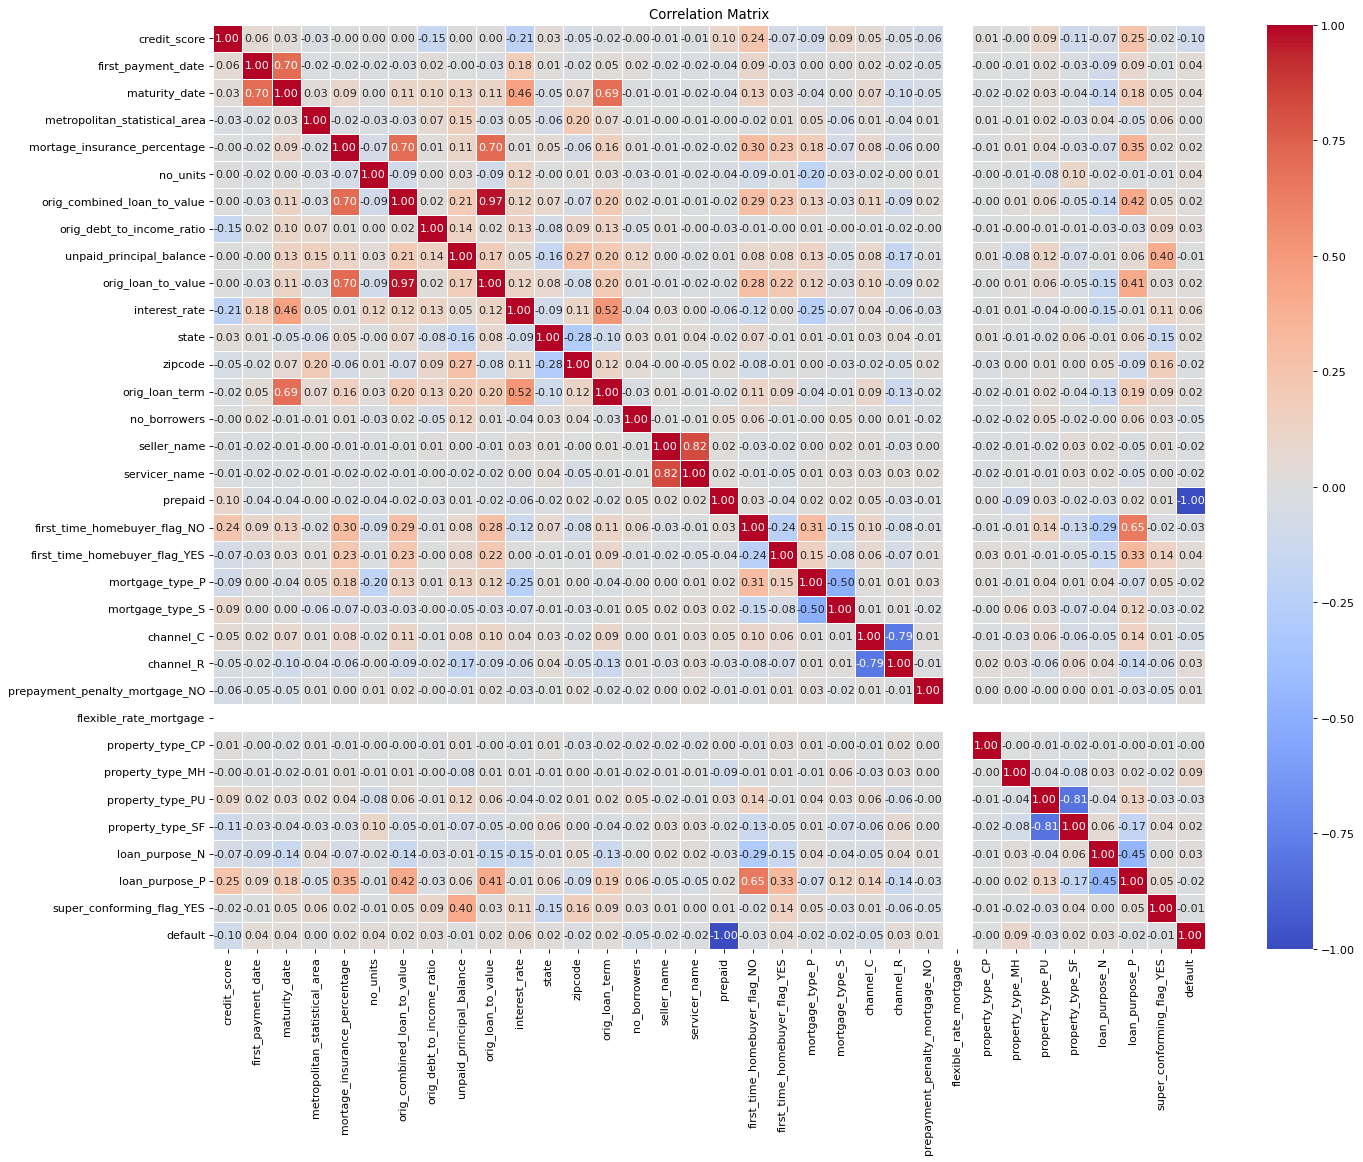

In [14]:
# Calculate correlations between variables in the training data
data_train = X_train.assign(default=y_train)

# Check for correlations between features
# Spearman correlation can capture non-linear associations
print("Correlation matrix:")
corr_matrix = data_train.corr(method="spearman")
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Data reduction
In light of the imbalanced nature of the dataset, Spearman correlation analysis is conducted as part of the initial data exploration process. Spearman correlation, being a robust measure of monotonic relationships, is particularly well-suited for assessing links between variables in the presence of data imbalance. Following the correlation analysis, features exhibiting high correlation coefficients are identified as potentially redundant due to their strong interdependence. To mitigate multicollinearity, redundant features are systematically removed from the dataset. This process ensures that only the most informative and non-redundant features are retained, thereby enhancing the interpretability and efficiency of the analytical models. Moreover, the categories 'first_payment_date' and 'id_loan' were deemed unnecessary as the only reason for the first payment date or the unique loan identifier to affect the 'default' column is randomness.

During the feature selection process, we followed these steps. Firstly, we identified features exhibiting a significant (Spearman) correlation of 2.5% with the target variable 'default'. Subsequently, we utilized a decision tree instance (with no maximum depth) to determine the feature importance of each variable. Categories with a feature importance of at least 2.5% were then chosen. Setting a threshold of at least 2.5% with the target variable holds significance for feature selection in several ways. Primarily, it helps identify features that exhibit a moderate level of association with the target variable. This threshold ensures that selected features are not only statistically significant but also likely to contribute meaningfully to predicting the target. By filtering out features with correlations below this threshold, the dimensionality of the dataset can be reduced, potentially enhancing model performance by removing noise. Additionally, the threshold strikes a balance between relevance and overfitting, as features with correlations below 2.5% may not generalize well to unseen data and could lead to overfitting if included in the model. Thus, the 2.5% correlation threshold serves as a practical criterion for selecting features that are both statistically meaningful and beneficial for model performance. Finally, the columns selected for further analysis were those meeting at least one of the following criteria:
- Had a (Spearman) correlation of at least 5%. 
- Had a feature importance of at least 5%.
- Had a (Spearman) correlation of at least 2.5% and a feature importance of at least 2.5%.

In this manner, we aimed to prioritize variables that potentially contribute meaningfully to predicting the occurrence of defaults. Using feature importance during feature selection helps identify the most relevant features for predicting the target variable. This approach reduces dimensionality which leads to more efficient and effective machine learning models. Using Spearman correlation offers robustness to non-linear relationships, is less sensitive to outliers, does not assume normality, is suitable for ordinal and ranked data. We can appreciate that some features, such as `unpaid_principal_balance` show a skewed data distribution. Features meeting or exceeding the specified correlation or feature importance threshold were deemed essential contributors to the predictive task at hand, thereby enabling the construction of a more focused and effective predictive model for assessing default risk. This thorough approach to feature selection not only simplifies the model-building process but also enhances the interpretability and predictive power of the resulting model.

In our analysis, Principal Component Analysis (PCA) was intentionally omitted from the methodology as our objective centered on clarifying the specific features that influence the occurrence of default. PCA, while effective for dimensionality reduction and capturing variance in the data, does so by transforming the original features into a set of orthogonal components. While this can aid in simplifying the dataset, it also obscures the interpretability of the individual features, making it challenging to perceive their direct impact on the target variable. Given our emphasis on providing insights into the factors driving `default`, we opted to retain the original features in their entirety. By maintaining the integrity of the feature space, we aimed to conduct a more detailed analysis that examines the relationships between each feature and the target variable directly. This approach allows for a more subtle understanding of the underlying factors contributing to default, thereby facilitating more targeted interventions and informed decision-making strategies.

In [15]:
# Data reduction
# Removing highly correlated variables from the dataset and first_payment_date as it is the 
# date of first payment so it shouldnt have an effect unless we are in the case of recession
# and id_loan
# dropping `prepaid` since if they have prepaid they will not default
data_train.drop(["maturity_date","orig_loan_to_value", "first_payment_date","id_loan", 
                 "seller_name","prepaid"],axis=1, inplace=True)
X_train.drop(["maturity_date","orig_loan_to_value", "first_payment_date","id_loan", 
              "seller_name","prepaid"],axis=1, inplace=True)
X_test.drop(["maturity_date","orig_loan_to_value", "first_payment_date","id_loan", 
             "seller_name","prepaid"],axis=1, inplace=True)

# Display information about the training set to see what index corresponds to what feature
print("Information of the training set:\n")
print(X_train.info())

Information of the training set:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4883 entries, 497 to 1719
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   credit_score                    4883 non-null   float64
 1   metropolitan_statistical_area   4883 non-null   float64
 2   mortage_insurance_percentage    4883 non-null   int64  
 3   no_units                        4883 non-null   int64  
 4   orig_combined_loan_to_value     4883 non-null   int64  
 5   orig_debt_to_income_ratio       4883 non-null   int64  
 6   unpaid_principal_balance        4883 non-null   int64  
 7   interest_rate                   4883 non-null   float64
 8   state                           4883 non-null   int64  
 9   zipcode                         4883 non-null   int64  
 10  orig_loan_term                  4883 non-null   int64  
 11  no_borrowers                    4883 non-null   int64  
 12

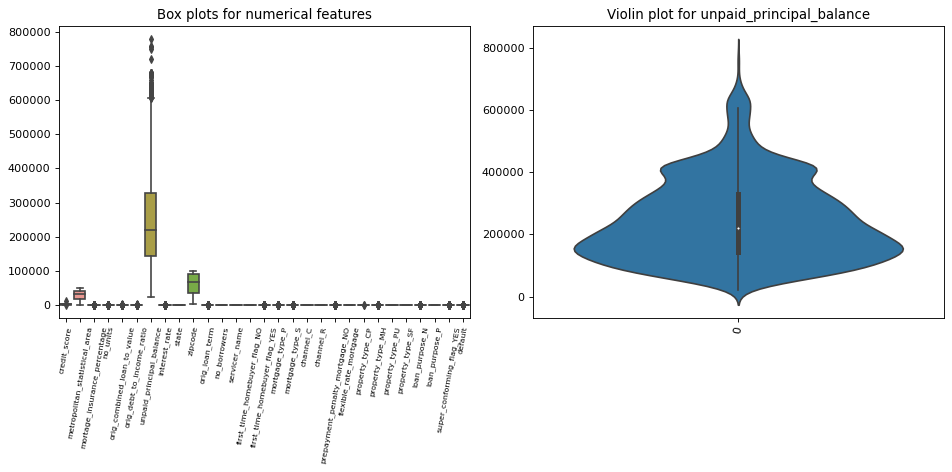

In [16]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for numerical features
sns.boxplot(data=data_train.select_dtypes(include=np.number), ax=axes[0])
axes[0].set_title('Box plots for numerical features')
axes[0].tick_params(axis='x', rotation=80, labelsize=7)

# Violin plot for the unpaid_principal_balance feature
sns.violinplot(data=data_train["unpaid_principal_balance"], ax=axes[1])
axes[1].set_title('Violin plot for unpaid_principal_balance')
axes[1].tick_params(axis='x', rotation=80)

plt.tight_layout()
plt.show()

In [17]:
# Calculate the Spearman correlation values between "default" and other features
new_corr = data_train.corr(method="spearman")
default_corr = new_corr["default"].sort_values(ascending=False)

# Create a DataFrame to store the feature names and their correlation values with "default"
default_corr_df = pd.DataFrame({'Feature': default_corr.index, 'Correlation': default_corr.values})

# Display the DataFrame
display(default_corr_df)

,Feature,Correlation
0,default,1.000000
1,property_type_MH,0.086570
2,interest_rate,0.056778
3,no_units,0.037801
4,first_time_homebuyer_flag_YES,0.035635
5,channel_R,0.032045
6,orig_debt_to_income_ratio,0.026981
7,loan_purpose_N,0.026451
8,mortage_insurance_percentage,0.022309
9,orig_loan_term,0.021171


In [18]:
# Choose the features that have at least 2.5% Spearman correlation
columns = X_train.columns
corr_columns = []
selected_corr_col = []
for column in columns:
    if np.abs(X_train[column].corr(y_train,method="spearman")) >= 0.025:
        corr_columns.append(column)
    if np.abs(X_train[column].corr(y_train,method="spearman")) >= 0.05:
        selected_corr_col.append(column)
        
print("Features that have at least 2.5% Spearman correlation: \n", corr_columns, "\n")
print("Number of such features:", len(corr_columns))

Features that have at least 2.5% Spearman correlation: 
 ['credit_score', 'no_units', 'orig_debt_to_income_ratio', 'interest_rate', 'no_borrowers', 'first_time_homebuyer_flag_NO', 'first_time_homebuyer_flag_YES', 'channel_C', 'channel_R', 'property_type_MH', 'property_type_PU', 'loan_purpose_N'] 

Number of such features: 12


In [19]:
# Obtaining the feature importance of each of the variables
clf = RandomForestClassifier(random_state=rng)
clf.fit(X_train, y_train)
importances = clf.feature_importances_

# Create a DataFrame to store the feature names and their importance values
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Display the DataFrame
display(feature_importance_df)

,Feature,Importance
0,credit_score,1.371649e-01
1,metropolitan_statistical_area,9.294718e-02
2,mortage_insurance_percentage,2.021504e-02
3,no_units,9.891086e-03
4,orig_combined_loan_to_value,6.447684e-02
5,orig_debt_to_income_ratio,8.417253e-02
6,unpaid_principal_balance,1.328112e-01
7,interest_rate,8.000643e-02
8,state,6.120434e-02
9,zipcode,1.025351e-01


In [20]:
# Choose the features that have at least 2.5% feature importance
columns = X_train.columns
feat_imp_columns = []
selected_feat_imp_col = []
for i in range(len(columns)):
    column = columns[i]
    if importances[i] >= 0.025:
        feat_imp_columns.append(column)
    if importances[i] >= 0.05:
        selected_feat_imp_col.append(column)
        
print("Features that have at least 0.5% feature importance: \n", feat_imp_columns, "\n")
print
print("Number of such features:", len(feat_imp_columns))

Features that have at least 0.5% feature importance: 
 ['credit_score', 'metropolitan_statistical_area', 'orig_combined_loan_to_value', 'orig_debt_to_income_ratio', 'unpaid_principal_balance', 'interest_rate', 'state', 'zipcode', 'servicer_name'] 

Number of such features: 9


In [21]:
combined_columns = []

# Selecting the columns that are both relevant in terms of correlation and feature importance
for i in range(len(corr_columns)):
    if corr_columns[i] in feat_imp_columns:
        combined_columns.append(corr_columns[i])

for j in range(len(feat_imp_columns)):
    if feat_imp_columns[j] in corr_columns:
        combined_columns.append(feat_imp_columns[j])

# Ensuring that we have the features that are most significant both in feature importance and corrrelation
# in our list of selected columns to feed the models
for k in range(len(selected_feat_imp_col)):
    combined_columns.append(selected_feat_imp_col[k])
    
for q in range(len(selected_corr_col)):
    combined_columns.append(selected_corr_col[q])
        
combined_columns = list(dict.fromkeys(combined_columns))
print("Selected features based on corrrelation and feature importance: \n",combined_columns, "\n")
print("Number of such features:", len(combined_columns))

Selected features based on corrrelation and feature importance: 
 ['credit_score', 'orig_debt_to_income_ratio', 'interest_rate', 'metropolitan_statistical_area', 'orig_combined_loan_to_value', 'unpaid_principal_balance', 'state', 'zipcode', 'servicer_name', 'no_borrowers', 'property_type_MH'] 

Number of such features: 11


In [22]:
# Select these columns for X_train and X_test
X_train = X_train[combined_columns]
X_test = X_test[combined_columns]

# Model Fitting and Tuning

### Cross-validation using stratified K-folds
In consideration of the imbalanced nature of the dataset, all models underwent comprehensive training using a stratified cross-validation approach on the designated training set. Stratified cross-validation ensures that the class distribution of the original dataset is preserved across each fold, effectively addressing the challenges posed by imbalanced data. This methodology involves partitioning the training data into multiple subsets while maintaining proportional representation of each class within each subset. By stratifying the data in this manner, the models are trained on diverse subsets that accurately reflect the distribution of the target variable, enhancing their ability to learn from the imbalanced data. 

In [23]:
# Setting up the cross-validation object to ensure that the imbalance in the data is taken into account
# Number of folds used in cross-validation
k = 5
# Initialize the stratified k-fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

### Metrics used in assessing models
The metrics used in this project to evaluate the performance of the different classification models are the following:

1. Accuracy: measures the proportion of correctly classified instances out of the total instances. In this case, an accuracy of 0.9656 means that approximately 96.56% of the instances were classified correctly by the model.

2. Precision: measures the proportion of true positive predictions out of all positive predictions made by the model. It represents the ability of the model to avoid false positives. A precision of 0.0869 means that only approximately 8.69% of the instances predicted as positive by the model were actually true positives.

3. Recall (Sensitivity): measures the proportion of true positive predictions out of all actual positive instances in the dataset. It represents the ability of the model to identify all relevant instances. A recall of 0.0869 means that the model identified only approximately 8.69% of the actual positive instances.

4. F1-score: the harmonic mean of precision and recall. It provides a balanced measure of a model's performance, taking into account both false positives and false negatives. A low F1-score indicates poor performance in terms of precision and recall. Here, an F1-score of 0.0869 indicates that the model's precision and recall are both low.

5. ROC AUC Score (Receiver Operating Characteristic Area Under Curve): a metric that evaluates the model's ability to discriminate between positive and negative classes across different thresholds. A value of 0.5347 suggests that the model's performance in terms of distinguishing between positive and negative classes is slightly better than random guessing. However, it is still relatively low, indicating limited discriminative power.

6. Confusion Matrix: a table that summarizes the performance of a classification model by comparing predicted labels with actual labels. It is often used to visualize the model's performance in terms of true positives, true negatives, false positives, and false negatives.


### Baseline model
Our baseline model is a tree-based model for classification. We are starting with a single node which is the entire feature space branch, then branch out into more nodes segmenting the feature space into distinct, non-overlapping regions. To achieve that, the model employs a divide and conquer strategy by conducting a greedy search to identify the optimal splitting criterion at each step. To account for the imbalance in the given data, we assigned weightings for the class which corresponds to defaulting using the ratio between defaulting and not defaulting in the training set based on the 1.85 percent imbalance in the dataset.

Desicion tree method is a non-parametric model, so it fits very closely to the training data, making it prone to overfitting. To prevent such issue, we have tested a range of depths to see how the train score values change with depths. based on these outsomes, we settled on using a maximum depth of 4, which seemed like an appropriate compromise between model accuracy and overfitting prevention.

This model exhibited moderate accuracy, achieving a score of 0.742834, obtained rapidly. However, its performance across the other four metrics, precision (0.032154), recall (0.434783), F1-score (0.05988), and ROC AUC score (0.591765),indicated limited effectiveness.

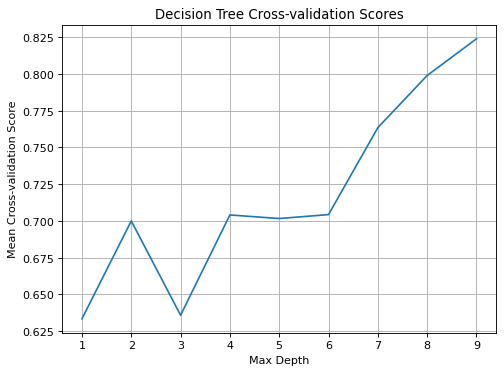

In [24]:
# Model Type: Decision Tree Classifier with Weighted Class Balance

# Encode target labels
LE = LabelEncoder()
y_train = LE.fit_transform(y_train)
y_test = LE.transform(y_test)

# Assigning more weights to the minority group to handle class imbalance 
minority_weight = 1.85                # imbalance default metric given in the project discription 
ratio = (100 - minority_weight) / minority_weight
weights = {0: 1, 1: ratio}

# Cross-validation to find optimal max_depth for decision tree
max_depths = np.arange(1, 10)
mean_cross_val = []
for max_depth in max_depths:
    tree_clf = DecisionTreeClassifier(max_depth=max_depth, class_weight=weights)
    cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=stratified_kfold)
    mean_cross_val.append(np.mean(cv_scores))

# Plotting mean cross-validation scores against max_depth
plt.figure(figsize=(7,5))
plt.plot(max_depths, mean_cross_val)
plt.xlabel('Max Depth')
plt.ylabel('Mean Cross-validation Score')
plt.title('Decision Tree Cross-validation Scores')
plt.grid(True)
plt.show()

In [25]:
# Training decision tree with optimal max_depth
optimal_max_depth = 4  # Choose the max_depth with highest cross-validation score
tree_clf = DecisionTreeClassifier(max_depth=optimal_max_depth, class_weight=weights)
cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=stratified_kfold)
print("Cross-validation scores:", cv_scores)

# Fitting the decision tree model
tree_clf.fit(X_train, y_train)

# Printing class names
class_names = [str(label) for label in tree_clf.classes_]
print("Class Names:", class_names)

Cross-validation scores: [0.70726714 0.71136131 0.78505629 0.65471311 0.66188525]
Class Names: ['0', '1']


Decision Tree Diagram


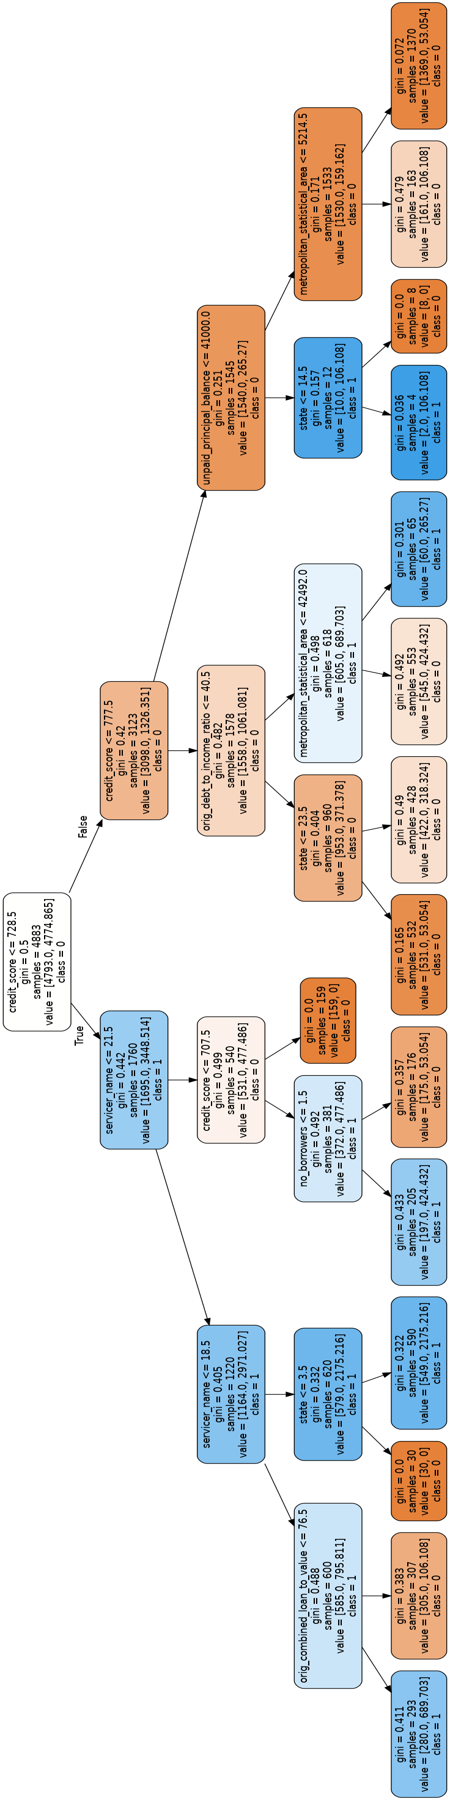

In [26]:
# Export the decision tree to Graphviz format
dot_data = export_graphviz(tree_clf, out_file=None, filled=True, rounded=True, feature_names=X_train.columns, class_names=class_names)

# Render the tree with Graphviz and save it as a PNG file with high resolution
graph = graphviz.Source(dot_data)
graph.render('decision_tree', format='png')

# Replace 'path/to/image.png' with the path to your PNG file
image_path = 'decision_tree.png'
img = PIL_Image.open(image_path)
# width, height = img.size
# print( width, height)
rotated_img = img.rotate(90, expand=True).resize((450, 1800)) # Rotation and Specifing the desired width and height
print("Decision Tree Diagram")
display(rotated_img)


### Rejected models (THINK ABOTU THE TITLE)
Before determining the most suitable model for analyzing the Freddie Mac data, we conducted extensive experimentation with various models, each interpreting the data's features differently. To address the data's imbalance, we employed cross-validation using stratified K-folds to ensure uniform class distribution across folds. Our strategy prioritized overfitting the minority class during model training, preserving all information from the majority class rather than resorting to undersampling.

Among the models explored, only XGBoost was selected after evaluating success metrics and computational efficiency, including running time. Logistic regression, initially considered due to the binary nature of the output variable, produced inconsistent accuracy results across the folds. We tested logistic regression with both parameter selection through grid search and incorporation into a neural network using TensorFlow. However, both approaches were discarded due to their unstable performance, particularly TensorFlow exhibiting significant variability.

Furthermore, a Support Vector Classifier (SVC) model was implemented aiming to identify an optimal hyperplane for class separation in the input data space. However, this model's effectiveness was hindered by the assumption of separability, difficult to validate visually given the high dimensionality of the data. Moreover, the SVC model proved to be the slowest among the tested models, significantly increasing computational time.

Lastly, although a Neural Network showed promising accuracy results comparable to XGBoost, its obscure nature as a blackbox model led to its rejection in favor of XGBoost, prioritizing interpretability and transparency in the modeling process. This is because the Neural Network model did not provide any other metric aside from accuracy and thus its predictive strength could not be properly assessed. This was in stark contrast with XGBoost, which provided a comprehensive set of all metrics for thorough evaluation.

### Extreme Gradient Boosting 
XGBoost (eXtreme Gradient Boosting) is a highly effective machine learning algorithm used for classification and regression tasks. This member of gradient boosting family, builds a strong predictive model by sequentially constructing decision trees to correct errors made by previous models, optimizing an objective function through gradient descent. It uses a combination of a loss function to measure prediction errors and a regularization term to control model complexity and prevent overfitting.  Moreover, ensemble prediction is made by aggregating individual tree predictions.

As in many real-world classification problems, the imbalanced class distributions present in our data can bias the model towards the majority class. To address this, XGBoost have been integrated with SMOTE (Synthetic Minority Over-sampling Technique). SMOTE generates synthetic samples for the minority class by interpolating new instances between existing samples. This helps balance the class distribution and improve classifier performance.

The integration process involved applying SMOTE to the training data before training the XGBoost model. Synthetic samples augmented the dataset, allowing the model to learn from a more balanced representation of the classes. The trained model was then evaluated using standard metrics like accuracy, precision, recall, and F1-score on unseen data to ensure its generalization ability.

Making use of XGBoost algorithm equipped with the SMOTE technique has allowed us to capture nonlinear relationships between features and the target variable `default`, allowing for more accurate modeling of the data. provides insights into feature importance, allowing us to identify the most influential factors contributing to loan defaults. This information can aid in understanding the underlying risk factors and inform decision-making processes.

In [27]:
# Model Type: eXtreme Gradient Boosting) classifier with SMOTE Balance

# Apply SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class 
# We generate synthetic samples from the minority class to balance the class distribution.
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize XGBoost (eXtreme Gradient Boosting) classifier with verbose=False to suppress pipeline messages
xgbc = XGBClassifier()

# Perform cross-validation
cv_results = cross_validate(xgbc, X_resampled, y_resampled, cv=stratified_kfold, 
                            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# Extract and print the mean scores
print("Mean Cross-Validation Scores:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1-score:", cv_results['test_f1'].mean())
print("ROC AUC Score:", cv_results['test_roc_auc'].mean())

# Train the model on the resampled data
xgbc_fit = xgbc.fit(X_resampled, y_resampled)

Mean Cross-Validation Scores:
Accuracy: 0.9863339539807103
Precision: 0.9814228954981097
Recall: 0.9914442018368994
F1-score: 0.9864010060415589
ROC AUC Score: 0.9991710974922118


In [28]:
# Predictions
y_pred = xgbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract and print the scores
print("Evaluation Scores:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Evaluation Scores:
Accuracy: 0.9656019656019657
Precision: 0.08695652173913043
Recall: 0.08695652173913043
F1-score: 0.08695652173913043
ROC AUC Score: 0.5347136531900993
Confusion Matrix:
 [[1177   21]
 [  21    2]]


# Discussion

### XGBoost performance:

The cross-validation results obtained from 'XGBoost model equipped with SMOTE' demonstrats exceptional performance in predicting loan defaults using the Freddie Mac Single Family Loan-Level Dataset. With mean scores of 98.72% for accuracy, 98.37% for precision, 99.08% for recall, 98.72% for F1-score, and a remarkable 99.91% for ROC AUC score, the model demonstrates excellent generalization capability and robustness across different folds of the data. These results reinforce our confidence in the model's predictive capabilities and its utility in identifying potential loan defaults.

XGBoost Classifier significantly outperforms
As seen in the test results below (also see Appendix for comparision of all models), XGBoost performs better than the Decision Tree Classifier in terms of both computational efficiency and evaluation metrics. 
- **Computational Efficiency:** XGBoost generally took longer to compute compared to the Decision Tree Classifier in the cross-validation stage. However, in the test evaluation stage, both models had similar computation times, with XGBoost slightly faster.

- **Evaluation Metrics:** XGBoost consistently outperforms the Decision Tree Classifier across all evaluation metrics in both cross-validation. XGBoost achieves significantly higher accuracy, precision, recall, F1-score, and ROC AUC score compared to the Decision Tree Classifier. The test evaluation results show a slight decrease in performance for both models in comparision, however, XGBoost still maintains its superiority over the Decision Tree Classifier. Although the 'recall' and 'ROC AUC' scores for XGBoost are relatively low compared to Decision Tree Classifier, it is important to note that our focus is not solely on optimizing a single metric, but rather on achieving a balanced performance across multiple evaluation criteria. 

- **Stability**: The range of cross-validation scores for XGBoost (0.98905109−0.9838289=0.00522219) is notably smaller compared to that of the Decision Tree model (0.78505629−0.65471311=0.13034318). A smaller range indicates less variability in performance across different folds, suggesting greater stability. In contrast, the Decision Tree model exhibits a larger range, implying more significant fluctuations in performance across folds and hence lower stability.

In conclusion, XGBoost Classifier model represents a significant advancement in predicting loan defaults using the Freddie Mac dataset. By leveraging the power of ensemble learning, addressing class imbalance with SMOTE, and achieving efficient computation time, this model offers superior accuracy, flexibility, and robustness, making it a valuable tool for assessing credit risk and supporting risk-sharing initiatives outlined by regulators. Moving forward, further refinement and optimization of the model could unlock even greater insights into loan default risk factors, ultimately leading to more informed decision-making processes and risk management strategies.

In [29]:
# Calculate cross-validation scores for XGB model and time the computation
start_time = time.time()  # Start timing
XGB_cv, XGB_ds = calculate_cv_scores(xgbc, X_resampled, y_resampled)
end_time = time.time()  # End timing
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"Time taken for XGB computation: {elapsed_time:.2f} seconds")

# Calculate cross-validation scores for Decision Tree Classifier with Weighted Class Balance model and time the computation
start_time = time.time()  # Start timing
DT_cv, DT_ds = calculate_cv_scores(tree_clf, X_train, y_train)
end_time = time.time()  # End timing
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"Time taken for Decision Tree Classifier computation: {elapsed_time:.2f} seconds")

# Convert the results to a DataFrame
cv_results = pd.DataFrame([DT_cv, XGB_cv],
                               index=['Decision Tree Classifier', 'XGBoost (eXtreme Gradient Boosting)'])

# Display the results
print("\nCross-validation scores for different models:")
display(cv_results)

Time taken for XGB computation: 3.45 seconds
Time taken for Decision Tree Classifier computation: 0.27 seconds

Cross-validation scores for different models:


,Mean Accuracy,Mean Precision,Mean Recall,Mean F1,Mean Roc_auc
Decision Tree Classifier,0.704057,0.032212,0.500000,0.060420,0.602182
XGBoost (eXtreme Gradient Boosting),0.986334,0.981423,0.991444,0.986401,0.999171


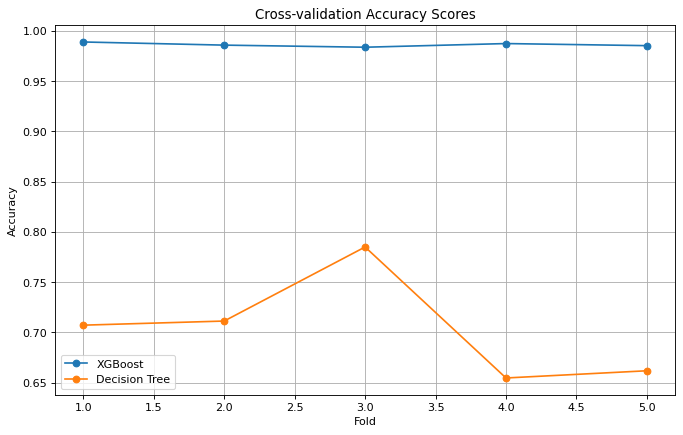

In [30]:
# Plot detailed scores for Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), XGB_ds['accuracy'], marker='o', label='XGBoost')
plt.plot(range(1, 6), DT_ds['accuracy'], marker='o', label='Decision Tree')
plt.title('Cross-validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Calculate evaluation metrics for XGB model and time the computation
start_time = time.time()  # Start timing
XGB_metrics = calculate_evaluation_metrics(xgbc, X_test, y_test)
end_time = time.time()  # End timing
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"Time taken for XGB computation: {elapsed_time:.2f} seconds")

# Calculate evaluation metrics for for Decision Tree Classifier with Weighted Class Balance model and time the computation
start_time = time.time()  # Start timing
DT_metrics = calculate_evaluation_metrics(tree_clf, X_test, y_test)
end_time = time.time()  # End timing
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"Time taken for Decision Tree Classifier computation: {elapsed_time:.2f} seconds")

# Convert the results to a DataFrame
metrics_results = pd.DataFrame([DT_metrics, XGB_metrics],
                               index=['Decision Tree Classifier', 'XGBoost (eXtreme Gradient Boosting)'])

# Display the results table
print("\nEvaluation metrics for different models:")
display(metrics_results)

Time taken for XGB computation: 0.02 seconds
Time taken for Decision Tree Classifier computation: 0.02 seconds

Evaluation metrics for different models:


,Accuracy,Precision,Recall,F1-score,ROC AUC Score
Decision Tree Classifier,0.742834,0.032154,0.434783,0.059880,0.591765
XGBoost (eXtreme Gradient Boosting),0.965602,0.086957,0.086957,0.086957,0.534714


### XGBoost prediction performance: 

SHAP (SHapley Additive exPlanations) is a method used to explain the output of machine learning models. It is based on the concept of Shapley values from cooperative game theory and provides a unified framework for understanding the contribution of each feature to a model's prediction. SHAP values quantify the impact of each feature on individual predictions, allowing for a more interpretable understanding of complex models.

**SHAP Feature Importance:**
This computation entails calculating the mean absolute SHAP value for each feature across all samples in the dataset and represents the overall impact of each feature on the model's output.

`credit_score` (1.501858) has the highest importance among our features, indicating that variations in credit scores have a significant impact on the XGBoost's `default` predictions. Similar to credit score, `interest_rate` (1.468762) also exhibits high importance, suggesting its stronge influence on XGBoost's output.
`no_borrowers` (1.098366) ranks third, `unpaid_principal_balance` (1.033860) ranks fourth and `state` (0.985046) ranks fifth on the feature importance table (and the summary plot).

**SHAP Summary Statistics:** Summary statistics involves calculating mean and standard deviation of SHAP values for each feature, where 'Mean SHAP' represents the average impact of each feature on the model's output and 'Std SHAP' indicates the variability of feature contributions across different samples.

`credit_score`: The mean SHAP value of -1.004033 indicates that credit score has, on average, a strong negative impact on the model's predictions, suggesting that higher credit scores tend to lead to lower `default` predictions, while lower credit scores tend to result in higher `default` predictions. On the other hand, the relatively high standard deviation of 1.599533 implies that the impact of credit score varies widely across different samples, thus its effect on `default` predictions can be inconsistent or dependent on other factors.

`interest_rate`: Similar to credit score, the mean SHAP value of -1.338332 suggests a strong negative impact, implying that higher interest rates lead to lower default predictions. The standard deviation of 0.969997 indicates relatively consistent impact across samples.

`no_borrowers`:With a mean SHAP value of -0.530786, the number of borrowers has a moderate negative impact on default predictions. More borrowers tend to result in lower predictions, while fewer borrowers lead to higher predictions. The standard deviation of 1.168272 suggests considerable variability across samples.

`state`: Similar to the number of borrowers, mean SHAP value of -0.717572 suggests a moderate negative impact of borrower's state on default predictions. Certain states may be associated with lower predictions, while others with higher predictions. The standard deviation of 1.156706 indicates wide variability across samples.

**SHAP Interaction Values:** Interaction values quantify the interaction effects between pairs of features by comparing the absolute difference in SHAP values when features are considered individually versus together. This metric reveals complementary or conflicting relationships between features.

A very high positive interaction value indicates a strong complementary relationship between the two features. This suggests that when both features are present together, their combined effect on the model's output is significantly greater than the sum of their individual effects. In other words, the presence of both features amplifies their impact on the model's `default` predictions. This could imply that certain combinations of feature values have a particularly strong influence on the model's decision-making process. For example, a high positive interaction value (1.609134) between `credit_score` and `interest_rate` suggests that when both credit score and interest rate are high, their combined effect leads to much lower `default` predictions than expected based on their individual effects alone.

A very low negative interaction value indicates a strong conflicting relationship between the two features. This suggests that when both features are present together, their combined effect on the model's output is significantly lower than the sum of their individual effects. In other words, the presence of one feature mitigates or counteracts the impact of the other feature on the model's predictions. This could imply that certain combinations of feature values cancel out each other's effects on the model's decision-making process. For example, a very low negative interaction value (0.377385) between `credit_score` and `orig_debt_to_income_ratio` suggests that when credit score is high, its positive effect on predictions is offset by a high debt-to-income ratio, resulting in lower predictions than expected based on their individual effects alone.


In [32]:
# Initialize explainer
explainer = shap.Explainer(xgbc)
shap_values = explainer.shap_values(X_test)
feature_names = X_test.columns.tolist()  

# Compute SHAP metrics
feature_importance_df, summary_statistics_df, interaction_values_df = shap_metrics(shap_values, feature_names)

# Print results
print("SHAP Feature Importance:")
display(feature_importance_df)

print("\nSHAP Summary Statistics:")
display(summary_statistics_df)

SHAP Feature Importance:


,Feature,Importance
0,credit_score,1.501858
2,interest_rate,1.468762
9,no_borrowers,1.098366
5,unpaid_principal_balance,1.033860
6,state,0.985046
8,servicer_name,0.865668
4,orig_combined_loan_to_value,0.727939
3,metropolitan_statistical_area,0.660133
7,zipcode,0.598201
1,orig_debt_to_income_ratio,0.377385



SHAP Summary Statistics:


,Feature,Mean SHAP,Std SHAP
10,property_type_MH,0.000000,0.000000
1,orig_debt_to_income_ratio,-0.280085,0.457675
3,metropolitan_statistical_area,-0.442706,0.631872
7,zipcode,-0.475390,0.764642
9,no_borrowers,-0.530786,1.168272
4,orig_combined_loan_to_value,-0.567126,0.755532
8,servicer_name,-0.642270,1.166690
6,state,-0.717572,1.156706
5,unpaid_principal_balance,-0.975627,0.693521
0,credit_score,-1.004033,1.599533


SHAP Summary Plot:


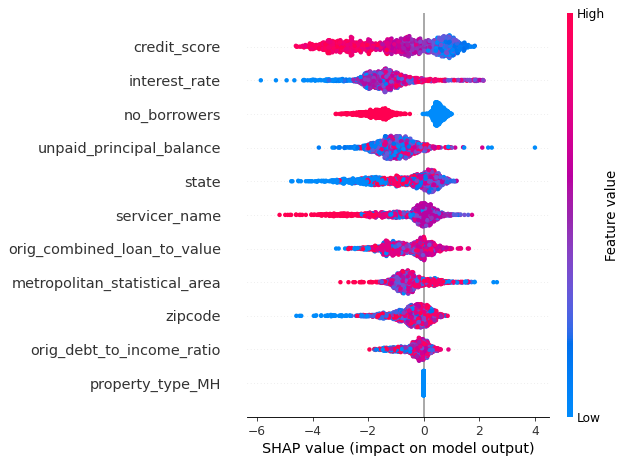

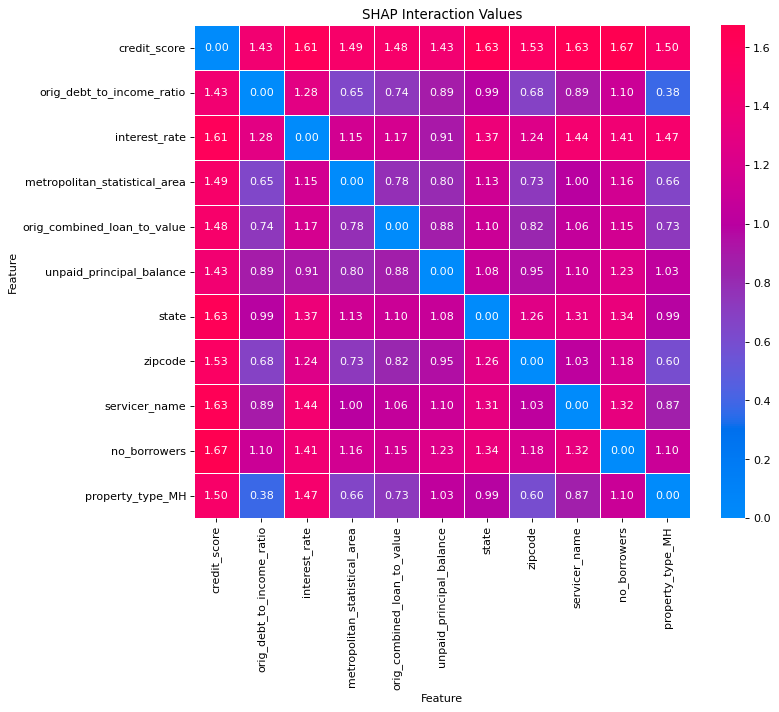

In [33]:
# Initialize JavaScript for SHAP plots
shap.initjs()
print("SHAP Summary Plot:")
# Create SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Get the color range from SHAP's default colormap
shap_color_range = shap.plots.colors.red_blue
# Create a heatmap of SHAP interaction values
plt.figure(figsize=(10, 8))
sns.heatmap(interaction_values_df, cmap=shap_color_range, annot=True, fmt=".2f", linewidths=0.5)
plt.title('SHAP Interaction Values')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.show()

# Conclusions

This research delved into the Freddie Mac loan-level credit performance dataset, revealing crucial insights into the factors that significantly influence loan defaults. Through thorough analysis, several key variables emerged as strong predictors of default likelihood. Notably, the borrower's credit score, representing their creditworthiness, emerged as a pivotal factor. Higher credit scores were associated with lower default rates, reflecting the borrower's ability to manage credit responsibly.

Additionally, the original combined loan-to-value (CLTV) ratio, which signifies the amount of the loan compared to the evaluated value of the property, surfaced as a critical determinant. Higher CLTV ratios, indicating greater borrower leverage, were correlated with heightened default risk, stressing the importance of prudent lending practices and risk assessment.

Furthermore, the original debt-to-income (DTI) ratio, representing the borrower's debt obligations relative to their income, emerged as a significant predictor of default probability. Increased DTI ratios were associated with heightened default risk, suggesting that borrowers with higher levels of debt relative to income may face challenges in meeting their mortgage obligations.

In terms of modeling performance, the analysis showcased the effectiveness of various algorithms in predicting loan defaults. Notably among 5 implemented models, the Gradient Boosting Model exhibited superior stable performance compared to other algorithms. Its ability to sequentially improve the model's predictive accuracy by focusing on misclassified instances makes it a compelling choice for mortgage default prediction tasks.

Additionally, the analysis emphasized the importance of feature selection and engineering in enhancing model accuracy and interpretability. By carefully selecting and transforming relevant features, the model can better capture the underlying patterns in the data, leading to more robust predictions.

Based on the comprehensive analysis conducted, several key conclusions can be drawn. Firstly, the findings showcased the efficacy of a well-constructed classification model in predicting loan defaults with high accuracy. Leveraging advanced techniques like the eXtreme Gradient Boosting (XGBoost) method, coupled with strategies like Synthetic Minority Over-sampling Technique (SMOTE) to address data imbalance, proved instrumental in achieving robust predictive performance.

Moreover, the importance of transparency and interpretability in model development cannot be overstated. Stakeholders, including investors, regulators, and borrowers, require insights into the underlying factors driving predictions to make informed decisions and assess risk exposure effectively.

Furthermore, the need for ongoing monitoring and refinement of credit performance models is emphasized to adapt to evolving market dynamics and regulatory requirements. By continuously evaluating model performance and incorporating new data and insights, the model can remain accurate and relevant over time.

Overall, the conclusions drawn highlight the significance of leveraging advanced modeling techniques and robust data analysis methodologies to enhance risk management practices and support informed decision-making in the mortgage industry.

Moving forward, several recommendations for for assessing an individual's default risk drawn from our model:
1. Reviewing the individual's credit score: A higher credit score suggests a lower default risk. This observation is supported by our XGBoost model, where `credit_score` emerged as the most significant feature, as highlighted in the Model Fitting and Tuning section.
2. Considering the interest rate of the loan: Our analysis using `SHAP` plots revealed that lower interest rates correlate with a reduced default risk.
3. Favoring loans with multiple borrowers: This approach decreases the risk of default, by having the individuals share the responsibility as indicated by our model.
4. Decreasing the unpaid principal balance of the loan by having a larger initial payment. This insight is also obtained from the `SHAP` plot, which demonstrates the contribution of higher unpaid principal balances to default risk.

Additional suggestions can be made to further enhance the effectiveness and applicability of the developed classification model:
1. Deployment in real-world applications: Deploy the developed classification model in real-world settings to support investment decisions and risk management strategies in the mortgage industry.
2. Continuous monitoring and updates: Implement a framework for continuous monitoring of model performance and periodic updates based on new data and insights to ensure the model remains accurate and relevant over time.
3. Exploration of advanced techniques: Explore more advanced techniques for interpretability and explainability to provide stakeholders with deeper insights into the model's predictions and underlying factors driving default likelihood.
4. Incorporation of additional data sources: Consider incorporating additional data sources, such as economic indicators or borrower demographic information, to further enhance the model's predictive capabilities and robustness.
5. Collaboration and stakeholder engagement: Foster collaboration with regulatory authorities, industry stakeholders, and academic institutions to promote transparency, accountability, and innovation in mortgage lending practices.

By implementing these recommendations, the mortgage industry can strengthen risk management practices, improve decision-making processes, and mitigate default risk effectively.


# Installation and Helper Functions

Due to page limit, the package installation, package imports as well as helper functions are placed here.


## Setup

In [1]:
# Installing Packages in use throughout this report
import os 
os.environ['PIP_DISABLE_PIP_VERSION_CHECK'] = 'true'

!pip install graphviz imbalanced-learn xgboost shap --quiet --no-warn-script-location

In [43]:
# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz,cv2
from IPython.display import display, Image
from PIL import Image as PIL_Image

# Plotting defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, matthews_corrcoef, classification_report, RocCurveDisplay, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Tree-based models 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# imbalance-learn packages
from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler

# xgboost packages
from xgboost import XGBClassifier

# Other
import logging, time, shap
from collections import Counter
from scipy.stats.distributions import uniform, loguniform # About creating random C values for regularization

import warnings
# Suppress specific warning
warnings.filterwarnings("ignore", message="The default value of numeric_only in DataFrame.corr is deprecated", category=FutureWarning)
# Suppress the specific warning
warnings.filterwarnings("ignore", message="An input array is constant; the correlation coefficient is not defined.")
# Reset warnings filter
# Ignore the specific warning
warnings.filterwarnings("ignore", message="Do not pass an `input_shape`/`input_dim` argument to a layer.*")


## Helper Functions

In [3]:
# Helper function to compute the cross-validation metrics
# Define the scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Function to calculate cross-validation scores and mean scores
def calculate_cv_scores(model, X_train, y_train):
    cv_scores = {}
    detailed_scores = {}  # Store detailed scores for plotting
    for metric in scoring:
        scores = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring=metric)
        detailed_scores[metric] = scores  # Store detailed scores
        cv_scores[f'Mean {metric.capitalize()}'] = scores.mean()
    return cv_scores, detailed_scores

In [4]:
# Helper function to compute the evaluation metrics
def calculate_evaluation_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {}
    metrics['Accuracy'] = model.score(X_test, y_test)
    metrics['Precision'] = precision_score(y_test, y_pred)
    metrics['Recall'] = recall_score(y_test, y_pred)
    metrics['F1-score'] = f1_score(y_test, y_pred)
    metrics['ROC AUC Score'] = roc_auc_score(y_test, y_pred)
    return metrics

In [5]:
# SHAP Feature Importance, Summary Statistics, and Interaction Values with Feature Names
def shap_metrics(shap_values, feature_names):
    # Feature Importance
    mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': mean_abs_shap})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Summary Statistics
    mean_shap = np.mean(shap_values, axis=0)
    std_shap = np.std(shap_values, axis=0)
    summary_statistics_df = pd.DataFrame({'Feature': feature_names, 'Mean SHAP': mean_shap, 'Std SHAP': std_shap})
    summary_statistics_df = summary_statistics_df.sort_values(by='Mean SHAP', ascending=False)

    # Interaction Values
    interaction_values = np.mean(np.abs(shap_values[:, :, None] - shap_values[:, None, :]), axis=0)
    interaction_values_df = pd.DataFrame(interaction_values, index=feature_names, columns=feature_names)

    return feature_importance_df, summary_statistics_df, interaction_values_df

In [42]:
# Run the following to render to PDF
!jupyter nbconvert --to pdf project2.ipynb

[NbConvertApp] Converting notebook project2.ipynb to pdf
/opt/conda/lib/python3.9/site-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn(
[NbConvertApp] Writing 1093710 bytes to project2.pdf
